<a href="https://colab.research.google.com/github/PaletteofDesign/project_2_part_4/blob/main/project_2_part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from xgboost import XGBClassifier
from imblearn.pipeline import make_pipeline as make_pipeline_imb

In [3]:
# Loading data
f = '/content/creditcard.csv'
fraud_data = pd.read_csv(f)
fraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Evaluating data
fraud_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Evaluating data
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Checking for null values
fraud_data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# Evaluating null values
fraud_data[fraud_data['Amount'].isna()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [8]:
# Evaluating null values
fraud_data[fraud_data['Class'].isna()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [9]:
# Evaluating null values
fraud_data[fraud_data['V28'].isna()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [10]:
# Removing null values from data
fraud_data.dropna(inplace=True)

In [11]:
# Checking to make sure null data removed
fraud_data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
# Turning class into an int to remove decimal
fraud_data['Class'] = fraud_data['Class'].astype(int)
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
# Checking shape of data
fraud_data.shape

(284807, 31)

In [14]:
# Checking for duplicated data
fraud_data.duplicated().sum()


1081

In [15]:
fraud_data.drop_duplicates(keep='first', inplace=True)

In [16]:
# Checking the balance of the data. The data is imbalanced. 
fraud_data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [17]:
fraud_data[['Amount','Class']].loc[fraud_data['Class']==0]['Amount'].describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [18]:
fraud_data[['Amount','Class']].loc[fraud_data['Class']==1]['Amount'].describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [19]:
fraud = fraud_data[fraud_data['Class'] == 1]
no_fraud = fraud_data[fraud_data['Class'] == 0]
print('Fraud Cases: {}'.format(len(fraud)))
print('Non-Fraud Cases: {}'.format(len(no_fraud)))

Fraud Cases: 473
Non-Fraud Cases: 283253


Text(0.5, 1.0, 'Credit Card Transactions correlation')

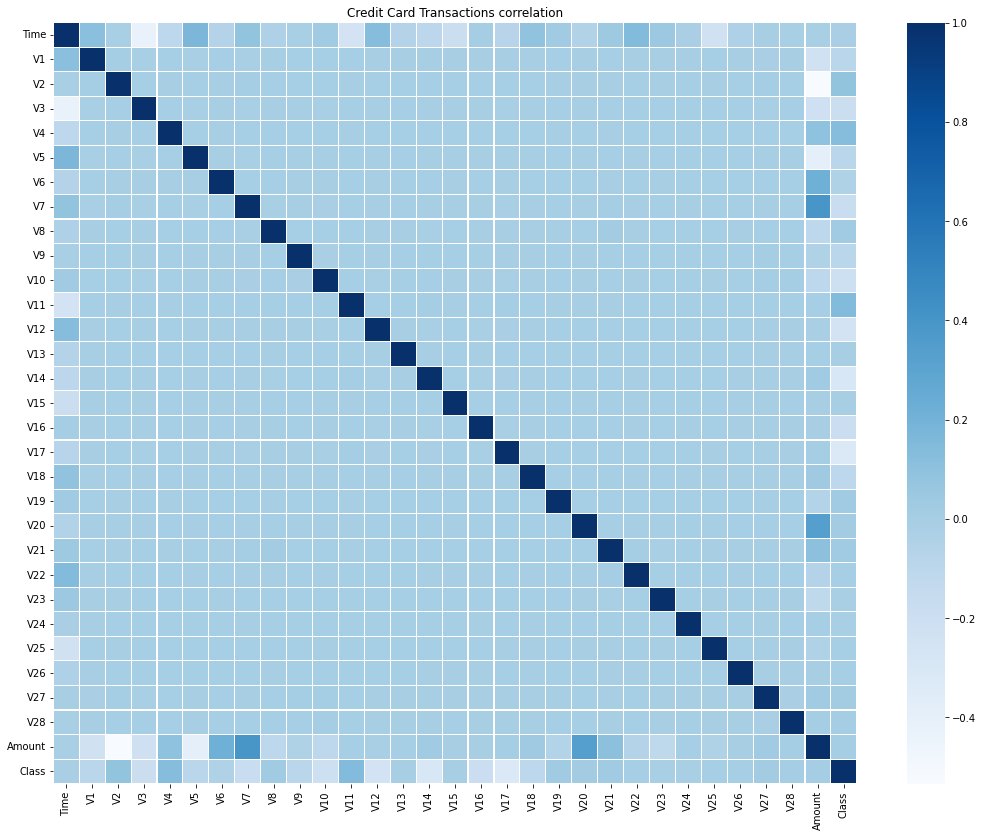

In [20]:
plt.figure(figsize = (18,14))
sns.heatmap(fraud_data.corr(), linewidths=.1, cmap='Blues')
plt.title('Credit Card Transactions correlation')
#plt.savefig('cc_tans_corr.png', bbox_inches='tight');

Text(0.5, 1.0, 'Amount Counts')

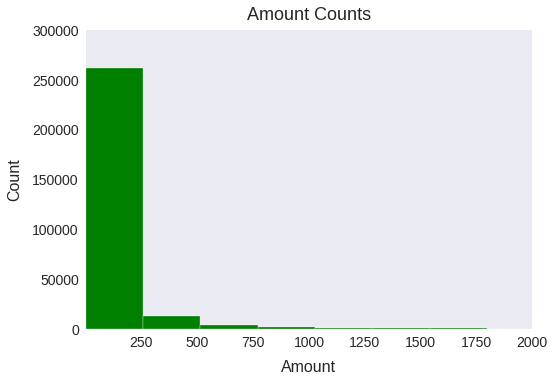

In [21]:
# Histogram to visually evaluate amount
plt.style.use('seaborn')
plt.hist(fraud_data['Amount'], edgecolor='white', color='green', bins=100)
plt.grid(False)
plt.xlabel('Amount', fontsize=16, labelpad=10)
plt.ylabel('Count', fontsize=16, labelpad=10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(1,2000)
plt.ylim(0,300000)
plt.title('Amount Counts', fontsize=18, pad=10)
#plt.savefig('cc_tans_amount.png', bbox_inches='tight');

Text(0.5, 0, 'Fraud')

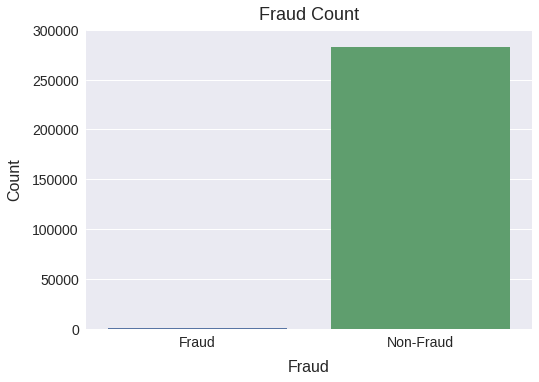

In [22]:
fig, ax = plt.subplots()
count = fraud_data['Class'].value_counts()
sns.barplot(data=fraud_data, x=count, y=count)
ax.set_xticklabels(['Fraud', 'Non-Fraud'], fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,300000)
plt.title('Fraud Count', fontsize=18, pad=10)
plt.ylabel('Count', fontsize=16, labelpad=10)
plt.xlabel('Fraud', fontsize=16, labelpad=10)
#plt.savefig('cc_fraud_count.png', bbox_inches='tight');

[Text(0, 0, 'Non-Fraud (0)'), Text(0, 0, 'Fraud (1)')]

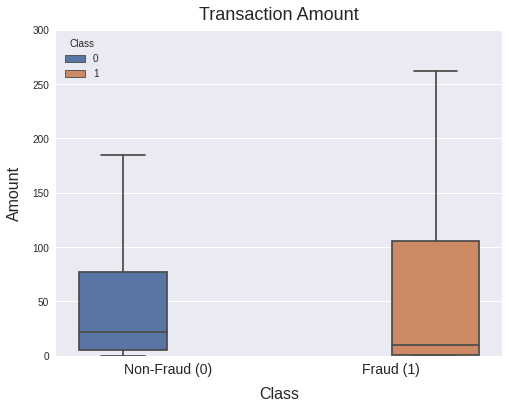

In [23]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x="Class", y="Amount", hue="Class", data=fraud_data, palette='deep', showfliers=False)
plt.title('Transaction Amount', fontsize=18, pad=10)
plt.ylabel('Amount', fontsize=16, labelpad=10)
plt.xlabel('Class', fontsize=16, labelpad=10)
plt.ylim(0,300)
ax.set_xticklabels(['Non-Fraud (0)', 'Fraud (1)'], fontsize=14)
#plt.savefig('cc_fraud_amount.png', bbox_inches='tight');

In [24]:
#fraud_data['Hour'] = fraud_data['Time'].apply(lambda x: np.floor(x / 3600))

In [25]:
f_mask = fraud_data['Class']==1
fraud_data[f_mask]['Class'].value_counts()

1    473
Name: Class, dtype: int64

Text(0, 0.5, 'Time')

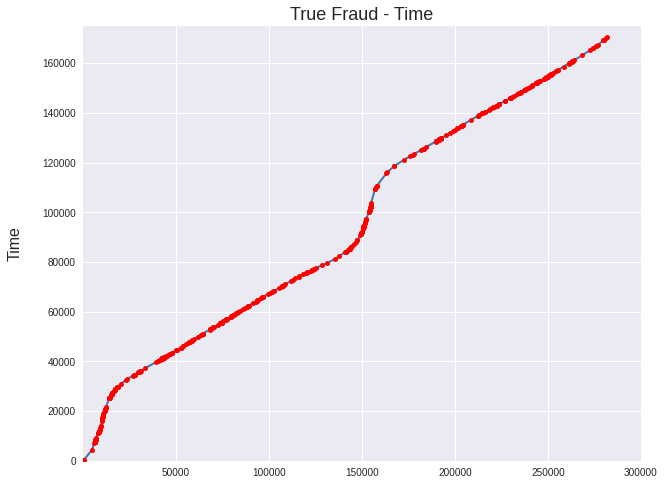

In [26]:
plt.figure(figsize=(10,8))
plt.plot(fraud_data[f_mask]['Time'], marker='.', markersize=10.0, lw=2, markerfacecolor='red');
plt.grid(True)
plt.ylim(0,175000)
plt.xlim(1,300000)
plt.title('True Fraud - Time', fontsize=18)
plt.ylabel('Time', fontsize=16, labelpad=20)
#plt.xlabel('Transactions', fontsize=16, labelpad=20);

(1.0, 175000.0)

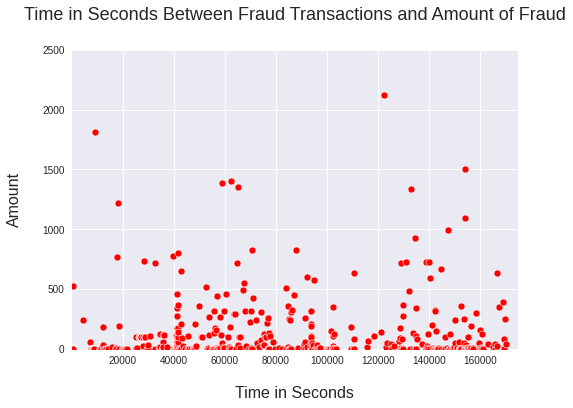

In [27]:
sns.scatterplot(x='Time', y='Amount', data=fraud_data[f_mask], color='red')
plt.ylabel('Amount', fontsize=16, labelpad=20)
plt.xlabel('Time in Seconds', fontsize=16, labelpad=20)
plt.title('Time in Seconds Between Fraud Transactions and Amount of Fraud', fontsize=18, pad=30)
plt.ylim(0,2500)
plt.xlim(1,175000)
#plt.savefig('cc_tans_time_fraud.png', bbox_inches='tight');

# Part 4

Models: Random Forest and Logistic Regression

In [28]:
# Basline
fraud_data['Class'].value_counts(normalize=True)

0    0.998333
1    0.001667
Name: Class, dtype: float64

In [29]:
X = fraud_data.drop(columns='Class')
y = fraud_data['Class']
print(X.shape)
print(y.shape)

(283726, 30)
(283726,)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [93]:
scaler = StandardScaler()
rf = RandomForestClassifier(max_depth=5, max_leaf_nodes=20, n_estimators=150, random_state=42)
lr = LogisticRegression(max_iter=200,random_state=42)

In [94]:
pipe = make_pipeline_imb(SMOTE(random_state=42), rf)
pipe_model = pipe.fit(X_train, y_train)
sm_pred = pipe_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [88]:
X_smt, y_smt = sm.fit_sample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [95]:
# See how imbalanced data is
np.bincount(y_train)

array([198269,    339])

In [90]:
np.bincount(y_smt)

array([283253, 283253])

In [97]:
print('Training accuracy:', pipe.score(X_train, y_train))
print('Test accuracy:', pipe.score(X_test, y_test))

Training accuracy: 0.9951764279384516
Test accuracy: 0.9945722408891187


In [98]:
print(classification_report(y_test, sm_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     84984
           1       0.20      0.84      0.33       134

    accuracy                           0.99     85118
   macro avg       0.60      0.92      0.66     85118
weighted avg       1.00      0.99      1.00     85118



In [99]:
print(confusion_matrix(y_test, sm_pred))

[[84543   441]
 [   21   113]]


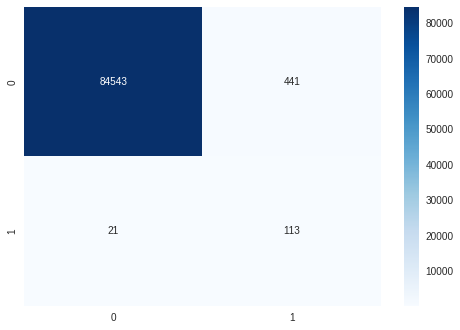

In [100]:
conf_mat = confusion_matrix(y_test, sm_pred)
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d');

In [101]:
pipe = make_pipeline_imb(SMOTE(random_state=42), lr)
pipe_model = pipe.fit(X_train, y_train)
sm_pred = pipe_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [102]:
print('Training accuracy:', pipe.score(X_train, y_train))
print('Test accuracy:', pipe.score(X_test, y_test))

Training accuracy: 0.9692308466929832
Test accuracy: 0.9690664724265138


In [103]:
print(classification_report(y_test, sm_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     84984
           1       0.04      0.84      0.08       134

    accuracy                           0.97     85118
   macro avg       0.52      0.90      0.53     85118
weighted avg       1.00      0.97      0.98     85118



In [104]:
print(confusion_matrix(y_test, sm_pred))

[[82373  2611]
 [   22   112]]


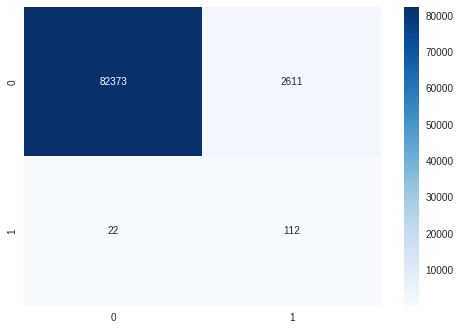

In [105]:
conf_mat = confusion_matrix(y_test, sm_pred)
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d');